#Name of project- stock market prediction

#description-

for most stock investors, the favorite question is "how long should we hold a stock for?". every investor wants to know how not to act too fearful and too greedy. and not all of them have warren buffet to guide them at every step. i'd suggest that you stop looking for him. rather, build your stock market predictor with artificial intelligence tools like machine learning. and the approach to this is so simple that you can consider adding this to your data science projects list.

In [1]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load Data

df = pd.read_csv("/content/stock_prices.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Stock'], dtype='object')

In [5]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Stock      0
dtype: int64

#Feature scaling

Feature scaling is a technique used in data preprocessing that aims to standardize the range of values of the different features (or variables) in a dataset. The purpose of feature scaling is to bring all features onto the same scale so that they can be compared and analyzed more effectively.

When features in a dataset have different ranges, some algorithms may give more weight to features with larger scales, which could lead to biased results. Feature scaling solves this issue by transforming the values of each feature into a common range, typically between 0 and 1 or -1 and 1, so that each feature contributes equally to the analysis.

Commonly used scaling techniques include Min-Max scaling, Standardization (Z-score normalization), Log transformation, and others.

#Below code explanation

This code is performing feature scaling on a dataset called df, specifically on the columns 'Open', 'High', 'Low', 'Close' and 'Volume'. Feature scaling is a common technique used to standardize the range of values of features in a dataset.

The MinMaxScaler() function is used to scale the values of the 'Open', 'High', 'Low', and 'Close' columns to be within a certain range (usually between 0 and 1). This is done by subtracting the minimum value of the column from each value and then dividing by the range (max value minus min value).

The same scaling technique is applied to the 'Volume' column, but with one difference. The .values.reshape(-1,1) method is used to reshape the column values into a 2D array with one column and as many rows as there are values. This is because the fit_transform() method requires a 2D array as input.

After scaling, the scaled values are assigned back to the respective columns of df.

In [6]:
# Data Processing
# Feature Scaling

scalar = MinMaxScaler()
df[['Open','High','Low','Close']] = scalar.fit_transform(df[['Open','High','Low','Close']])
df['Volume'] = scalar.fit_transform(df['Volume'].values.reshape(-1,1))

In [7]:
df['Volume']

0        0.011219
1        0.008708
2        0.020533
3        0.017937
4        0.027936
           ...   
19581    0.006414
19582    0.006234
19583    0.005057
19584    0.006089
19585    0.005344
Name: Volume, Length: 19586, dtype: float64

In [8]:
df['Open']

0        0.000923
1        0.000923
2        0.000926
3        0.000936
4        0.000962
           ...   
19581    0.461672
19582    0.466689
19583    0.464853
19584    0.461025
19585    0.461129
Name: Open, Length: 19586, dtype: float64

In [9]:
df['Open'].max()

1.0

In [10]:
df['Open'].min()

0.0

In [11]:
df['High']

0        0.000929
1        0.000919
2        0.000948
3        0.000935
4        0.000958
           ...   
19581    0.463063
19582    0.463828
19583    0.462806
19584    0.460367
19585    0.459597
Name: High, Length: 19586, dtype: float64

In [18]:
# Feature Selection

X = df[['Open','High','Low','Close']]
y = df['Volume']

In [19]:
X

,Open,High,Low,Close
0,0.000923,0.000929,0.000927,0.000927
1,0.000923,0.000919,0.000913,0.000920
2,0.000926,0.000948,0.000944,0.000940
3,0.000936,0.000935,0.000920,0.000907
4,0.000962,0.000958,0.000981,0.000967
...,...,...,...,...
19581,0.461672,0.463063,0.469953,0.467881
19582,0.466689,0.463828,0.472835,0.468089
19583,0.464853,0.462806,0.472062,0.466296
19584,0.461025,0.460367,0.466737,0.465621


In [20]:
y

0        0.011219
1        0.008708
2        0.020533
3        0.017937
4        0.027936
           ...   
19581    0.006414
19582    0.006234
19583    0.005057
19584    0.006089
19585    0.005344
Name: Volume, Length: 19586, dtype: float64

In [21]:
# Splitting the data into training and Testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.count()

Open     15668
High     15668
Low      15668
Close    15668
dtype: int64

In [23]:
X_test.count()

Open     3918
High     3918
Low      3918
Close    3918
dtype: int64

In [24]:
y_train.count()

15668

In [25]:
y_test.count()

3918

##LSTM

An LSTM (Long Short-Term Memory) model is a type of recurrent neural network (RNN) that is designed to handle sequential data, such as time-series or text data.

At its core, an LSTM model consists of a series of memory cells that can store information for an extended period of time. These memory cells are connected by a network of gates that regulate the flow of information into and out of the cells.

Each gate is composed of a sigmoid activation function and a point-wise multiplication operation. The sigmoid function acts as a switch that controls the flow of information, while the multiplication operation scales the input data.

There are three main types of gates in an LSTM model:

The forget gate, which determines what information to discard from the cell.
The input gate, which decides what new information to store in the cell.
The output gate, which determines what information to output from the cell.
The LSTM model is trained using a process called backpropagation through time (BPTT), which adjusts the weights of the gates based on the error between the predicted output and the actual output.

Overall, the LSTM model is a powerful tool for handling sequential data due to its ability to selectively store and retrieve information over long periods of time. It has been successfully applied to a wide range of tasks, including speech recognition, language translation, and time-series forecasting.

##Is it mandatory to convert our data into 3D


Yes, it is mandatory to format the data as a 3D tensor for input to an LSTM model.

The reason for this is that an LSTM model is designed to handle sequential data, which is inherently three-dimensional. In other words, the input to an LSTM model should be a three-dimensional tensor with shape (batch_size, time_steps, num_features).

batch_size: This is the number of samples in each batch of data.
time_steps: This is the number of time steps in each sample, representing the sequence length.
num_features: This is the number of features (or variables) in each time step.
For example, if you are using an LSTM model to forecast stock prices, batch_size would be the number of companies you are forecasting for, time_steps would be the number of days in the forecast horizon, and num_features would be the number of input variables (such as opening price, closing price, volume, etc.) for each day.

The data needs to be reshaped into this format before being fed into the LSTM model, typically using the reshape() function in NumPy or the reshape() method in TensorFlow or Keras.

In [26]:
# Reshape data to be 3D for LSTM model

from keras.layers import  LSTM

X_train = np.reshape(X_train.values,(X_train.shape[0],X_train.shape[1],1))

X_test = np.reshape(X_test.values,(X_test.shape[0],X_test.shape[1],1))

In [27]:
X_train

array([[[0.00334357],
        [0.00334161],
        [0.00334689],
        [0.00335825]],

       [[0.00071056],
        [0.00070524],
        [0.00069398],
        [0.00069043]],

       [[0.01420661],
        [0.01412168],
        [0.01392884],
        [0.01381124]],

       ...,

       [[0.02504974],
        [0.02598379],
        [0.02547948],
        [0.0256637 ]],

       [[0.00326468],
        [0.00326922],
        [0.00323958],
        [0.00325511]],

       [[0.06532931],
        [0.06569702],
        [0.06641517],
        [0.06609154]]])

#Define LSTM model architecture


LSTM model architecture refers to the structure and design of a Long Short-Term Memory (LSTM) neural network that is used to analyze sequential data, such as time-series or text data.

The LSTM model consists of a series of memory cells that can store information for an extended period of time. These memory cells are connected by a network of gates that regulate the flow of information into and out of the cells.

The LSTM model architecture typically includes the following components:

Input layer: This layer receives the input data and passes it on to the next layer.

LSTM layer: This layer consists of a series of memory cells connected by gates. The LSTM layer processes the input data sequentially, storing and retrieving information as needed.

Output layer: This layer produces the output of the model, which can be a single value (for regression tasks) or a set of probabilities (for classification tasks).

Activation functions: The LSTM model typically includes activation functions, such as sigmoid and tanh, that are used to regulate the flow of information through the gates and memory cells.

Loss function: This function measures the error between the predicted output and the actual output, and is used to guide the training of the model.

Optimization algorithm: This algorithm is used to minimize the loss function and adjust the weights of the model during training.

The specific architecture of an LSTM model can vary depending on the task and the data being analyzed. However, the core components described above are common to most LSTM models

In [29]:
# Define LSTM model architecture

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [30]:
# Compile the model

from sklearn.metrics import mean_squared_error

model.compile(loss='mean_squared_error',optimizer = 'adam')

In [31]:
# Train the model

Train_Model = model.fit(X_train,y_train,epochs=60,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/60
490/490 [==============================] - 13s 11ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 2/60
490/490 [==============================] - 6s 12ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/60
490/490 [==============================] - 3s 7ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/60
490/490 [==============================] - 4s 9ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/60
490/490 [==============================] - 3s 7ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/60
490/490 [==============================] - 6s 12ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/60
490/490 [==============================] - 6s 12ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/60
490/490 [==============================] - 5s 11ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/60
490/490 [==============================] - 4s 9ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/60
490/490 [==============================] - 3s 7ms/step - loss: 0.0014 - val_loss: 

In [32]:
# Evaluation of the model

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root_Mean_Squared_Error is :",rmse)

123/123 [==============================] - 1s 2ms/step
Root_Mean_Squared_Error is : 0.03485418983548809


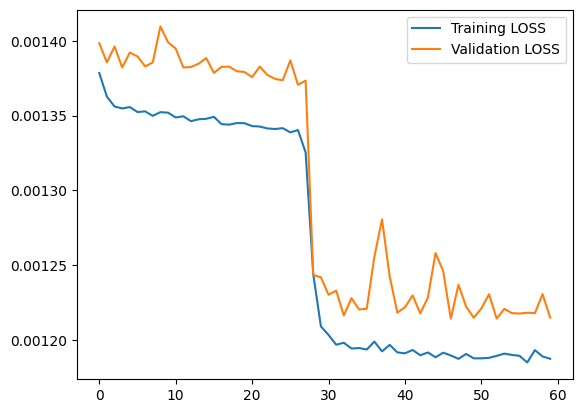

In [33]:
# Visualize training and validation loss


plt.plot(Train_Model.history['loss'],label='Training LOSS' )
plt.plot(Train_Model.history['val_loss'],label='Validation LOSS' )
plt.legend()
plt.show()

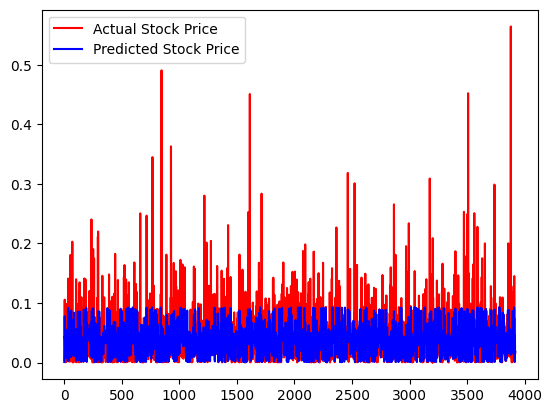

In [34]:
# Visualize actual vs predicted stock prices

plt.plot(y_test.values, color='red', label='Actual Stock Price')
plt.plot(y_pred, color='blue', label='Predicted Stock Price')
plt.legend()
plt.show()